In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from IPython.display import display, Javascript

%matplotlib widget
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

# Import CSV data
crime_data_csv = "data/crime_total_pop.csv"
crime_data_all = pd.read_csv(crime_data_csv)

pop_data_csv = "data/total_pop_data.csv"
pop_data_all = pd.read_csv(pop_data_csv)

In [2]:
# View the total pop dataframe
pop_data_all.drop(["Unnamed: 0"], axis=1, inplace=True)
pop_data_all.head()

,tract,all,all_no,all_hs,all_col,white,white_no,white_hs,white_col,black,black_no,black_hs,black_col,aian,aian_no,aian_hs,aian_col,asian,asian_no,asian_hs,asian_col,nhpi,nhpi_no,nhpi_hs,nhpi_col,other,other_no,other_hs,other_col,multi,multi_no,multi_hs,multi_col,hisp,hisp_no,hisp_hs,hisp_col
0,101,1237,46,1191,1103,1016,23,993,905,0,0,0,0,0,0,0,0,54,0,54,54,0,0,0,0,14,0,14,14,2,0,2,2,151,23,128,128
1,102,3244,83,3161,2913,2519,18,2501,2317,34,0,34,16,0,0,0,0,118,21,97,87,0,0,0,0,147,13,134,134,94,0,94,94,332,31,301,265
2,201,95,0,95,82,48,0,48,44,9,0,9,0,0,0,0,0,30,0,30,30,0,0,0,0,0,0,0,0,0,0,0,0,8,0,8,8
3,202,3129,15,3114,2772,2684,15,2669,2356,47,0,47,18,0,0,0,0,112,0,112,112,18,0,18,18,81,0,81,81,12,0,12,12,175,0,175,175
4,300,4802,4,4798,4425,3768,0,3768,3519,111,0,111,18,0,0,0,0,301,4,297,266,0,0,0,0,38,0,38,38,163,0,163,163,421,0,421,421


In [3]:
# View the crime data dataframe
crime_data_all.head()

,tract,offense,lat,long,total,total_no,total_hs,total_col,white,white_no,white_hs,white_col,black,black_no,black_hs,black_col,aian,aian_no,aian_hs,aian_col,asian,asian_no,asian_hs,asian_col,nhpi,nhpi_no,nhpi_hs,nhpi_col,other,other_no,other_hs,other_col,multi,multi_no,multi_hs,multi_col,hisp,hisp_no,hisp_hs,hisp_col
0,101,BURGLARY,38.906082,-77.056424,1237,46,1191,1103,1016,23,993,905,0,0,0,0,0,0,0,0,54,0,54,54,0,0,0,0,14,0,14,14,2,0,2,2,151,23,128,128
1,101,BURGLARY,38.909371,-77.055193,1237,46,1191,1103,1016,23,993,905,0,0,0,0,0,0,0,0,54,0,54,54,0,0,0,0,14,0,14,14,2,0,2,2,151,23,128,128
2,101,BURGLARY,38.909643,-77.052080,1237,46,1191,1103,1016,23,993,905,0,0,0,0,0,0,0,0,54,0,54,54,0,0,0,0,14,0,14,14,2,0,2,2,151,23,128,128
3,101,MOTOR VEHICLE THEFT,38.908966,-77.054766,1237,46,1191,1103,1016,23,993,905,0,0,0,0,0,0,0,0,54,0,54,54,0,0,0,0,14,0,14,14,2,0,2,2,151,23,128,128
4,101,MOTOR VEHICLE THEFT,38.908758,-77.055838,1237,46,1191,1103,1016,23,993,905,0,0,0,0,0,0,0,0,54,0,54,54,0,0,0,0,14,0,14,14,2,0,2,2,151,23,128,128


In [4]:
# Store the tract numbers for later use
tract = pop_data_all["tract"]
tract.reset_index(drop=True)

0         101
1         102
2         201
3         202
4         300
        ...  
201     10900
202     11001
203     11002
204     11100
205    980000
Name: tract, Length: 206, dtype: int64

In [5]:
# Count number of offenses occuring in each tract
crime_by_tract = crime_data_all.groupby(["tract"])["offense"].count()
crime_by_tract.reset_index(drop=True)

0       31
1      412
2       17
3      298
4       78
      ... 
201    104
202     36
203     10
204    396
205     37
Name: offense, Length: 206, dtype: int64

In [7]:
# Count population in each tract
pop_by_tract = crime_data_all.groupby(["tract"])["total"].max()
pop_by_tract.reset_index(drop=True)

0      1237
1      3244
2        95
3      3129
4      4802
       ... 
201    1904
202    2629
203    1777
204    4963
205      13
Name: total, Length: 206, dtype: int64

In [8]:
# Calculate crimes committed for every 100,000 people by tract (offense count / total pop * 100000)
crime_rate_by_tract = round(crime_by_tract / pop_by_tract * 100000)
crime_rate_by_tract.reset_index(drop=True)

0        2506.0
1       12700.0
2       17895.0
3        9524.0
4        1624.0
         ...   
201      5462.0
202      1369.0
203       563.0
204      7979.0
205    284615.0
Length: 206, dtype: float64

In [9]:
# Calculate percent educational attainment rates in each tract
attain_no = round(pop_data_all["all_no"] / pop_data_all["all"] * 100, 1)
attain_no.reset_index(drop=True)

0       3.7
1       2.6
2       0.0
3       0.5
4       0.1
       ... 
201    10.3
202     5.0
203     1.1
204    19.6
205     0.0
Length: 206, dtype: float64

In [10]:
# Calculate percent educational attainment rates in each tract
attain_hs = round(pop_data_all["all_hs"] / pop_data_all["all"] * 100, 1)
attain_hs.reset_index(drop=True)

0       96.3
1       97.4
2      100.0
3       99.5
4       99.9
       ...  
201     89.7
202     95.0
203     98.9
204     80.4
205    100.0
Length: 206, dtype: float64

In [11]:
# Calculate percent educational attainment rates in each tract
attain_col = round(pop_data_all["all_col"] / pop_data_all["all"] * 100, 1)
attain_col.reset_index(drop=True)

0       89.2
1       89.8
2       86.3
3       88.6
4       92.1
       ...  
201     17.7
202     71.5
203     76.9
204     38.9
205    100.0
Length: 206, dtype: float64

In [12]:
pd.DataFrame(crime_rate_by_tract)
crime_summary = crime_rate_by_tract.reset_index(drop=False)
crime_summary = crime_summary.replace([np.inf, -np.inf], 0)
crime_summary = crime_summary.rename(columns={"tract":"Tract", 0:"Crime Rate"})
crime_summary

,Tract,Crime Rate
0,101,2506.0
1,102,12700.0
2,201,17895.0
3,202,9524.0
4,300,1624.0
...,...,...
201,10900,5462.0
202,11001,1369.0
203,11002,563.0
204,11100,7979.0


In [13]:
# Add attainment values to dataframe
crime_summary["Less Than High School"] = attain_no
crime_summary["High School"] = attain_hs
crime_summary["College"] = attain_col
crime_summary

,Tract,Crime Rate,Less Than High School,High School,College
0,101,2506.0,3.7,96.3,89.2
1,102,12700.0,2.6,97.4,89.8
2,201,17895.0,0.0,100.0,86.3
3,202,9524.0,0.5,99.5,88.6
4,300,1624.0,0.1,99.9,92.1
...,...,...,...,...,...
201,10900,5462.0,10.3,89.7,17.7
202,11001,1369.0,5.0,95.0,71.5
203,11002,563.0,1.1,98.9,76.9
204,11100,7979.0,19.6,80.4,38.9


In [14]:
# Conduct outlier analysis to identify which tracts should not be included in final analysis
outliers_to_drop = []

crime_rate = crime_summary["Crime Rate"]

quartiles = crime_rate.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = crime_rate.loc[(crime_rate < lower_bound) | (crime_rate > upper_bound)]
print(f"Values below {lower_bound} are outliers.")
print(f"Values above {upper_bound} are outliers.")
if len(outliers) == 0:
    print(f"There are no outlier values.")
else:
    outliers_to_drop.append(outliers)
    print(f"Tract outliers include: {outliers}")
print(f"-----")

The lower quartile is: 3093.75
The upper quartile is: 6611.25
The interquartile range is: 3517.5
Values below -2182.5 are outliers.
Values above 11887.5 are outliers.
Tract outliers include: 1       12700.0
2       17895.0
75      20949.0
97      27106.0
122     12238.0
147     13059.0
151     18321.0
156     15660.0
190     13061.0
192     12473.0
196     17089.0
199     32681.0
200     16203.0
205    284615.0
Name: Crime Rate, dtype: float64
-----


In [15]:
# Remove outliers from dataset
crime_summary = crime_summary.drop([1, 2, 75, 97, 122, 147, 151, 156, 190, 192, 196, 199, 200, 205])
crime_summary

,Tract,Crime Rate,Less Than High School,High School,College
0,101,2506.0,3.7,96.3,89.2
3,202,9524.0,0.5,99.5,88.6
4,300,1624.0,0.1,99.9,92.1
5,400,3389.0,13.0,87.0,78.5
6,501,3119.0,1.2,98.8,89.9
...,...,...,...,...,...
198,10603,9712.0,1.3,98.7,85.3
201,10900,5462.0,10.3,89.7,17.7
202,11001,1369.0,5.0,95.0,71.5
203,11002,563.0,1.1,98.9,76.9


The correlation between Less Than High School and Crime Rate is 0.04


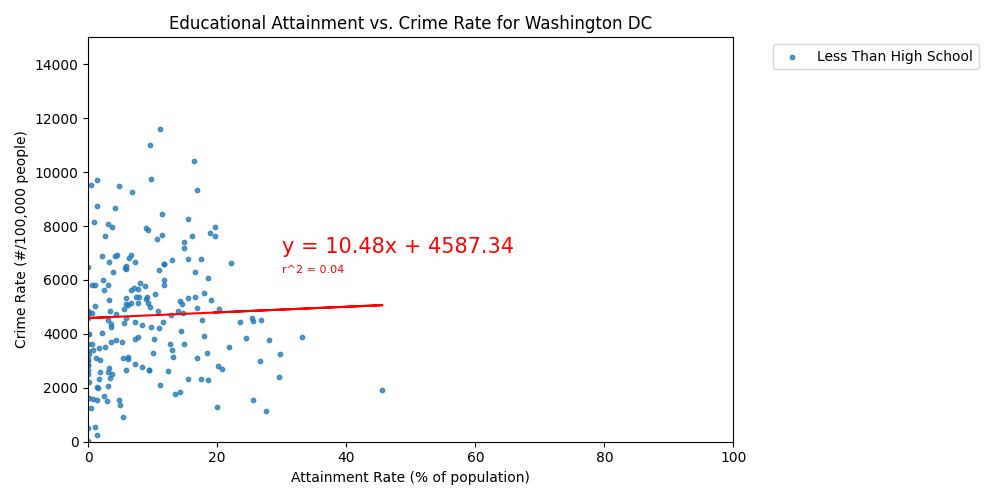

In [24]:
# Generate a scatter plot of less than high school educationol attainment vs crime rate for all tracts
plt.figure(figsize=(10,5))
x_axis_no = crime_summary["Less Than High School"]
y_axis_crime_rate = crime_summary["Crime Rate"]

plt.scatter(x_axis_no, y_axis_crime_rate, label="Less Than High School", marker="o", s=10, alpha=0.75)

correlation = st.pearsonr(x_axis_no, y_axis_crime_rate)
print(f"The correlation between Less Than High School and Crime Rate is {round(correlation[0],2)}")

r2 = round(correlation[0],2)
plt.annotate(f"r^2 = {r2}",(30,6250),fontsize=8,color="red")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_no, y_axis_crime_rate)
regress_values = x_axis_no * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_no, regress_values,"r-")
plt.annotate(line_eq,(30,7000),fontsize=15,color="red")

plt.title("Educational Attainment vs. Crime Rate for Washington DC")
plt.xlabel("Attainment Rate (% of population)")
plt.ylabel("Crime Rate (#/100,000 people)")
plt.xlim(0, 100)
plt.ylim(0, 15000)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("no_attainment_vs_crime_rate.png")
plt.show()

The correlation between High School and Crime Rate is -0.04


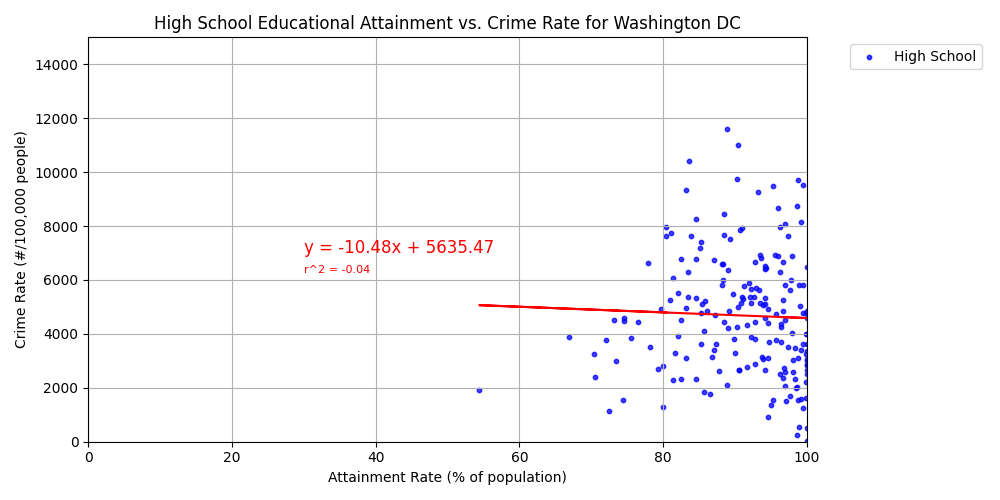

In [25]:
# Generate a scatter plot of high school educationol attainment vs crime rate for all tracts
plt.figure(figsize=(10,5))
x_axis_hs = crime_summary["High School"]
y_axis_crime_rate = crime_summary["Crime Rate"]

plt.scatter(x_axis_hs, y_axis_crime_rate, label="High School", marker="o", s=10, alpha=0.75, color="b")

correlation = st.pearsonr(x_axis_hs, y_axis_crime_rate)
print(f"The correlation between High School and Crime Rate is {round(correlation[0],2)}")

r2 = round(correlation[0],2)
plt.annotate(f"r^2 = {r2}",(30,6250),fontsize=8,color="red")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_hs, y_axis_crime_rate)
regress_values = x_axis_hs * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_hs, regress_values,"r-")
plt.annotate(line_eq,(30,7000),fontsize=12,color="red")

plt.title("High School Educational Attainment vs. Crime Rate for Washington DC")
plt.xlabel("Attainment Rate (% of population)")
plt.ylabel("Crime Rate (#/100,000 people)")
plt.xlim(0, 100)
plt.ylim(0, 15000)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.savefig("hs_attainment_vs_crime_rate.png")
plt.show()

The correlation between College and Crime Rate is -0.25


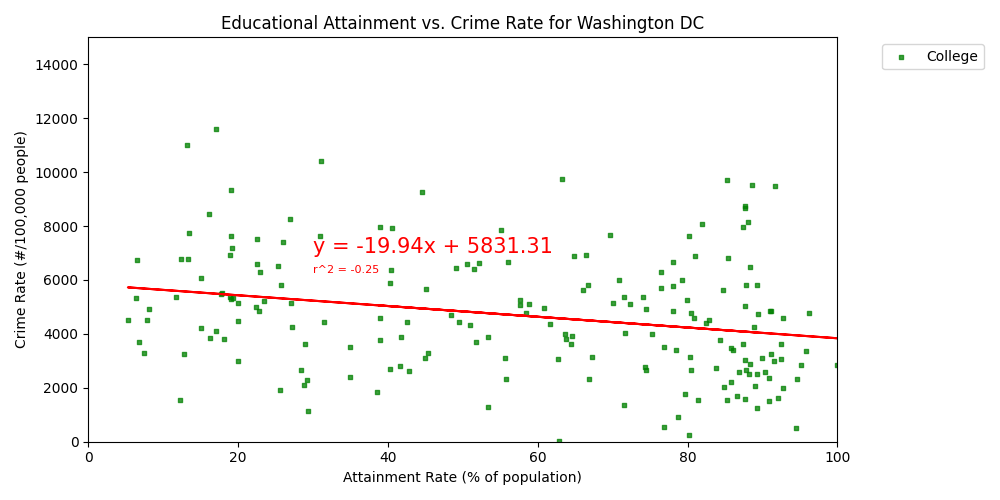

In [26]:
# Generate a scatter plot of college educationol attainment vs crime rate for all tracts
plt.figure(figsize=(10,5))
x_axis_col = crime_summary["College"]
y_axis_crime_rate = crime_summary["Crime Rate"]

plt.scatter(x_axis_col, y_axis_crime_rate, label="College", marker="s", s=8, alpha=0.75, color="g")

correlation = st.pearsonr(x_axis_col, y_axis_crime_rate)
print(f"The correlation between College and Crime Rate is {round(correlation[0],2)}")

r2 = round(correlation[0],2)
plt.annotate(f"r^2 = {r2}",(30,6250),fontsize=8,color="red")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_col, y_axis_crime_rate)
regress_values = x_axis_col * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis_col, regress_values,"r-")
plt.annotate(line_eq,(30,7000),fontsize=15,color="red")

plt.title("Educational Attainment vs. Crime Rate for Washington DC")
plt.xlabel("Attainment Rate (% of population)")
plt.ylabel("Crime Rate (#/100,000 people)")
plt.xlim(0, 100)
plt.ylim(0, 15000)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("col_attainment_vs_crime_rate.png")
plt.show()